In [51]:
pip install jupyter numpy scipy matplotlib ipython scikit-learn pandas pillow mglearn

Note: you may need to restart the kernel to use updated packages.


# Supervised Learning
- Is one of the most commonly used types of machine Learning.
- Is used when we want to to predict a certain outcome from a given input, and we have examples ofinput/output pairs.
- Using the input/output pairs we can build a ML model (training set).
- The goal is to make accurate predictions for new (never-before-seen) data.
- We can say that the a supervised learning model is able to *generalize* from the training set to the test set if it's able to make accurate predictions on unseen data.
- We always want to find the simplest model.
- *Overfitting*: build a model that is too complex for the amount of data we have.
- *Underfitting*: Choosing too simple a model

The two major types of supervised ML problems are *classification* and *regresion*.

### Classification tasks
- The goal is to predict a *class label* (a choice from predefined list of posibilities)
- Often separated into *binary classification* (distinguishing between exactly two classes) and *multiclass classification* (classification between more than two classes).

### Regression tasks
- The goal is to predict a continous number (floating-point number)

### Model Complexity - Dataset Size Relation
- The larger variety of data points the dataset contains, the more complex a model you can use.
- However, simply duplicating the same datapoints or collecting very similar data will not help.
 

## Supervised ML Algorithms


In [52]:
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import sklearn

## Sample datasets

/home/omorales/Documents/python/actiTIME/actiTIME_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
X.shape: (26, 2)


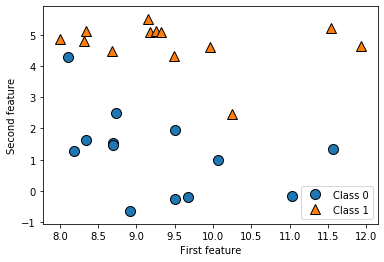

In [53]:
# forge dataset for two-class classification
# generate dataset
X, y = mglearn.datasets.make_forge()
#plot
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

In [54]:
# 26 datapoints, with two features

Text(0, 0.5, 'Target')

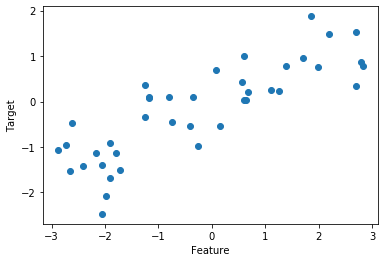

In [55]:
# to illustrate regression algorithms,we will use the wave dataset, it has a single input feature and a continous target variable (or response) that we want to model
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.xlabel("Feature")
plt.ylabel("Target")

In [56]:
# Wisconsin Breast Cancer dataset
#records clinical measurements of breast cancer tumors, each tumor is labeled as beningn or malignant
# the task is to predict wheter a tumor is malignant based on the measurements of the tissue

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [57]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [58]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [59]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [60]:
# Boston housing dataset
# predict the median value of homes in several Boston neighborhoodws in 1970s, using info such as crime rate , proximity to Charles River, highway accessibility, etc
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [61]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


## K-Nearest Neighbors
- k-NN algorithm is one of the simplest ML algorithm.
- Building the model consist only of storing the traing set.
- To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset

### K-Neighbors classification
- In its simplest version, the k-NN algorithm only considers exactly one nearest neighbor, the closest training data point to teh point we want to make a prediction for.

/home/omorales/Documents/python/actiTIME/actiTIME_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


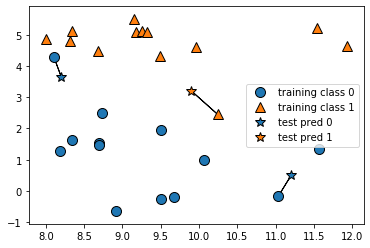

In [62]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

- We can also consider an arbitrary number, *k*, of neighbors
- When we consider more that one neighbor, we use *voting* to assign a label (for each test point , we count how many neighbors belogn to each class, then we assign teh class that is more frequent)

/home/omorales/Documents/python/actiTIME/actiTIME_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


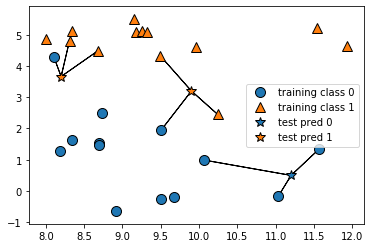

In [63]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

### K-Nearest Neighbors example

In [64]:
#step 1: split our data into a training set so we can evaluate *generalization* performance
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

/home/omorales/Documents/python/actiTIME/actiTIME_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [65]:
# Step 2: import and instantiate the class
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [66]:
#step 3: fit the classifier using the traing set (store the datset so we can computre neighbors during prediction)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [67]:
#step 4: test predictions on the test data using the predict method
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [68]:
# step 5: evaluate how well our model generalizes using the score method with the test data together with the test labels
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


In [69]:
#we can see that our model is about 86% accurate, meaning the model predicted the class correctly for 86% of the samples in the test dataset

### Analysing KNeighborClassifier
For two-dimensional datasets,we can also illustrate teh prediction for all possible test points in the xy plane.
We color the plane according ro the class that would be assigned to a point in this region.
This lets us view the *desicion boundary* (teh divide between where the algorithm assigns class 0 vs where it assigns class 1)

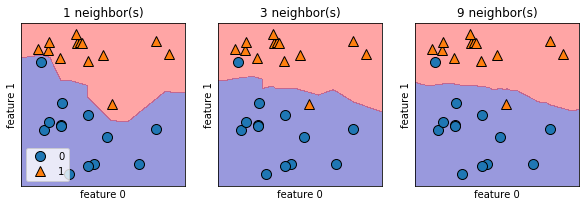

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

watching this we can assume that using a single neghbor results in a decision boundary that follows the training data closely